In [2]:
!pip install numpy


   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.9 MB 217.9 kB/s eta 0:01:09
    --------------------------------------- 0.2/14.9 MB 1.8 MB/s eta 0:00:09
   - -------------------------------------- 0.4/14.9 MB 2.4 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/14.9 MB 3.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.9/14.9 MB 3.0 MB/s eta 0:00:05
   --- ------------------------------------ 1.3/14.9 MB 3.5 MB/s eta 0:00:04
   ---- ----------------------------------- 1.7/14.9 MB 4.1 MB/s eta 0:00:04
   ----- ---------------------------------- 2.0/14.9 MB 4.3 MB/s eta 0:00:03
   ------ --------------------------------- 2.3/14.9 MB 4.3 MB/s eta 0:00:03
   ------- -------------------------------- 2.8/14.9 MB 4.6 MB/s eta 0:00:03
   -------- ------------------------------- 3.2/14.9 MB 4.6 MB/s eta 0:00:03
   --------- ------------------------------ 3.6/14.9 MB 4.7 MB/s eta 0:00:03
   -

In [4]:
!pip install scikit-learn

     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/59.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 59.0/59.0 kB 624.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
    --------------------------------------- 0.1/9.3 MB 4.3 MB/s eta 0:00:03
   - -------------------------------------- 0.4/9.3 MB 4.5 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/9.3 MB 5.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.3 MB 5.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.3 MB 4.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.3 MB 4.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.3 MB 4.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/9.3 MB 4.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.3 MB 4.8 MB/s eta 0:00:02
   --------- --

In [6]:
!pip install matplotlib

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ------- ------------------------------- 30.7/162.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.5 MB 8.9 MB/s eta 0:00:01
   --- ------------------------------------ 0.6/7.5 MB 5.5 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/7.5 MB 5.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.5 MB 6.3 MB/s eta 0:00:01
   --------- ------------------------------ 1.7/7.5 MB 6.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.5 MB 6.6 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/7.5 MB 6.9 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.5 MB 7.1 MB/s eta 0:00:01
   ---------------- ----------------------- 3.2/7.5 MB 7.0 MB/s eta 0:00:01
   -----------

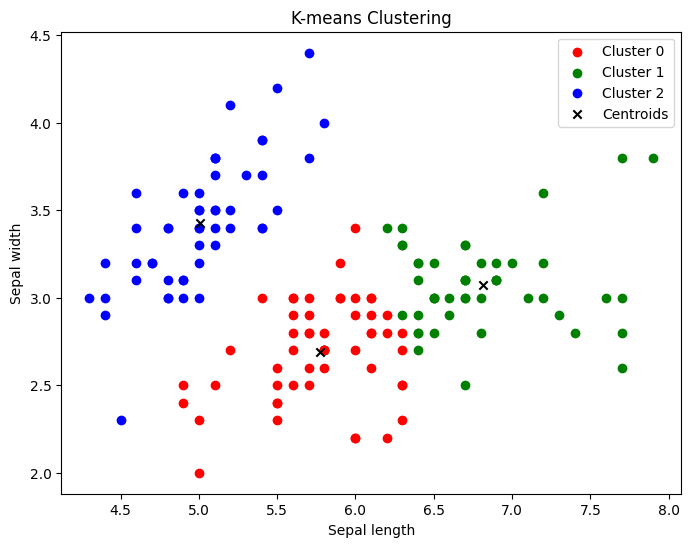

In [7]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
data = iris.data

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Function to initialize centroids randomly
def initialize_centroids(data, k):
    n_samples, n_features = data.shape
    centroids = np.zeros((k, n_features))
    for i in range(k):
        centroid = data[np.random.choice(range(n_samples))]
        centroids[i] = centroid
    return centroids

# Function to assign each sample to the nearest centroid
def assign_clusters(data, centroids):
    clusters = np.zeros(len(data))
    for i, sample in enumerate(data):
        distances = [euclidean_distance(sample, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

# Function to update centroids to the mean of all samples in the cluster
def update_centroids(data, clusters, k):
    n_samples, n_features = data.shape
    centroids = np.zeros((k, n_features))
    for i in range(k):
        cluster_samples = data[clusters == i]
        centroid = np.mean(cluster_samples, axis=0)
        centroids[i] = centroid
    return centroids

# Function to perform K-means clustering
def kmeans(data, k, max_iters=100):
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    
    # Main loop
    for _ in range(max_iters):
        # Assign clusters
        clusters = assign_clusters(data, centroids)
        
        # Update centroids
        new_centroids = update_centroids(data, clusters, k)
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids

# Function to visualize clusters
def visualize_clusters(data, clusters, centroids):
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i in range(len(centroids)):
        cluster_data = data[clusters == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='k', marker='x', label='Centroids')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('K-means Clustering')
    plt.legend()
    plt.show()

# Main function
def main():
    # Define the number of clusters
    k = 3
    
    # Perform K-means clustering
    clusters, centroids = kmeans(data[:, :2], k)
    
    # Visualize clusters
    visualize_clusters(data[:, :2], clusters, centroids)

if __name__ == "__main__":
    main()
